In [1]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from irt import IRTModel
from sklearn import svm
from sklearn.linear_model import SGDRegressor, LinearRegression, BayesianRidge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Fuel Consumption (Miles per Gallon)

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


Attribute Information:

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

In [3]:
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv('data/UCI - 45/auto_mpg.csv')
data.columns = names

In [4]:
data = data.dropna()

### Correlation Heatmap

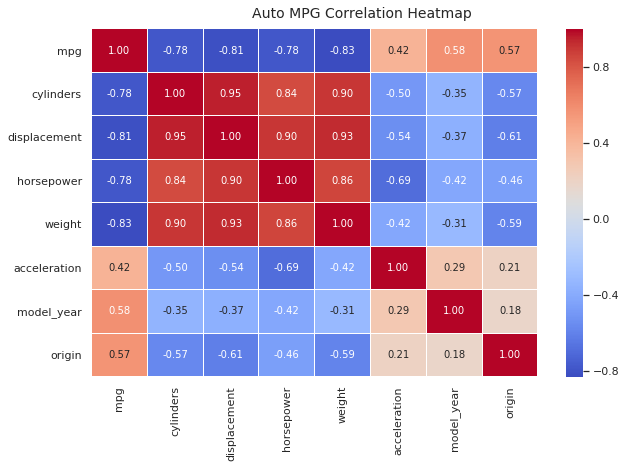

In [5]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Auto MPG Correlation Heatmap', fontsize=14)

### 3D Scatter Plot - Displacement x Weight x MPG

Text(0.5,0,'MPG')

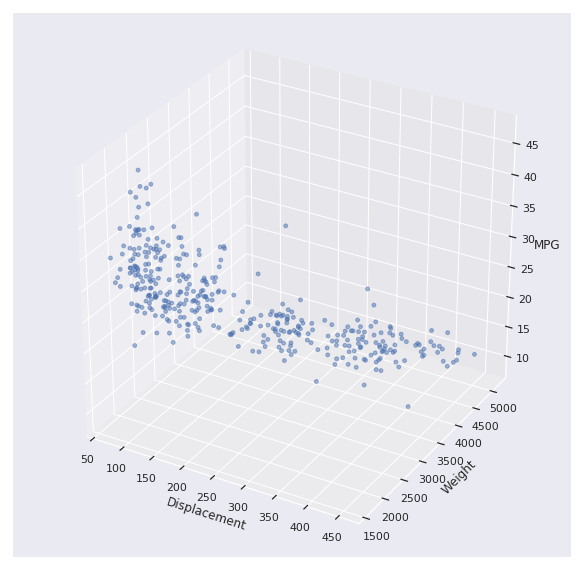

In [27]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['displacement'], data['weight'], data['mpg'], s=15, alpha=0.5)

ax.set_xlabel('Displacement')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')

### Item Response Theory

In [8]:
X = data.iloc[:, 1:-3]
y = data.iloc[:, 0]

Random split:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Machine learning models:

In [36]:
models = [LinearRegression(), BayesianRidge(), Lasso(), svm.SVR(kernel= 'linear'), svm.SVR(kernel = 'rbf'),\
     KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(),\
          AdaBoostRegressor(), MLPRegressor()]

Item-Response Matrix:

In [37]:
irt = IRTModel(models= models)
irt.fit(X_train= X_train, y_train= y_train)
irt.irtMatrix(X_test= X_test, y_test= y_test)

In [38]:
irt.irt_matrix

,343,12,6,210,304,228,224,183,383,205,...,213,288,308,202,26,370,57,229,19,157
LinearRegression,0.757850,0.128523,0.156748,0.549381,0.508594,0.830429,0.585481,0.203836,0.390696,0.279163,...,0.452531,0.768133,0.171036,0.774231,0.771872,0.420052,0.949506,0.313024,0.442360,0.736838
BayesianRidge,0.677474,0.131465,0.162516,0.481034,0.569914,0.960602,0.693031,0.196671,0.380265,0.273951,...,0.445809,0.894347,0.163953,0.567440,0.789162,0.387761,0.778578,0.315763,0.422193,0.889073
Lasso,0.770133,0.128473,0.158272,0.488304,0.563806,0.947935,0.611907,0.190824,0.385400,0.265007,...,0.422074,0.790360,0.173692,0.589136,0.797365,0.419095,0.829534,0.317736,0.378178,0.700717
SVR,0.246795,0.098090,0.119443,0.333590,0.436520,0.294626,0.223418,0.190031,0.203710,0.165144,...,0.210123,0.875513,0.148937,0.508241,0.251799,0.254802,0.638251,0.729653,0.214035,0.209277
SVR,0.095550,0.180625,0.180625,0.104862,0.100509,0.176564,0.329346,0.086683,0.154712,0.650905,...,0.683211,0.288710,0.220443,0.180625,0.361837,0.224031,0.094910,0.118152,0.124435,0.405897
KNeighborsRegressor,0.877193,0.189394,0.173611,0.909091,0.268817,0.209205,0.617284,1.000000,0.152439,0.467290,...,0.505051,0.403226,0.276243,0.458716,0.282486,0.276243,0.476190,0.161290,0.500000,0.490196
DecisionTreeRegressor,1.000000,0.333333,0.200000,0.500000,0.285714,0.357143,0.416667,1.000000,0.250000,0.200000,...,0.166667,0.500000,0.166667,0.250000,0.270270,0.333333,0.285714,0.142857,0.400000,0.066667
RandomForestRegressor,0.917431,0.342466,0.098619,0.800000,0.448430,0.645161,0.318471,0.909091,0.617284,0.324675,...,0.239234,0.336700,0.416667,0.227273,0.555556,0.806452,0.330033,0.246914,0.349650,0.340136
AdaBoostRegressor,0.406170,0.134387,0.140743,0.481786,0.372439,0.905292,0.447284,0.369565,0.287081,0.277955,...,0.384956,0.713115,0.155251,0.278947,0.883978,0.699242,0.325139,0.794319,0.210210,0.303763
MLPRegressor,0.042806,0.119439,0.088701,0.042377,0.047919,0.088590,0.139533,0.026339,0.061141,0.574004,...,0.919400,0.110816,0.376086,0.055990,0.167905,0.080439,0.035512,0.071092,0.049090,0.525193


### 2D Scatter Plots (Displacement, Weight, Acceleration, MPG)

In [39]:
types = list(y_test.index)

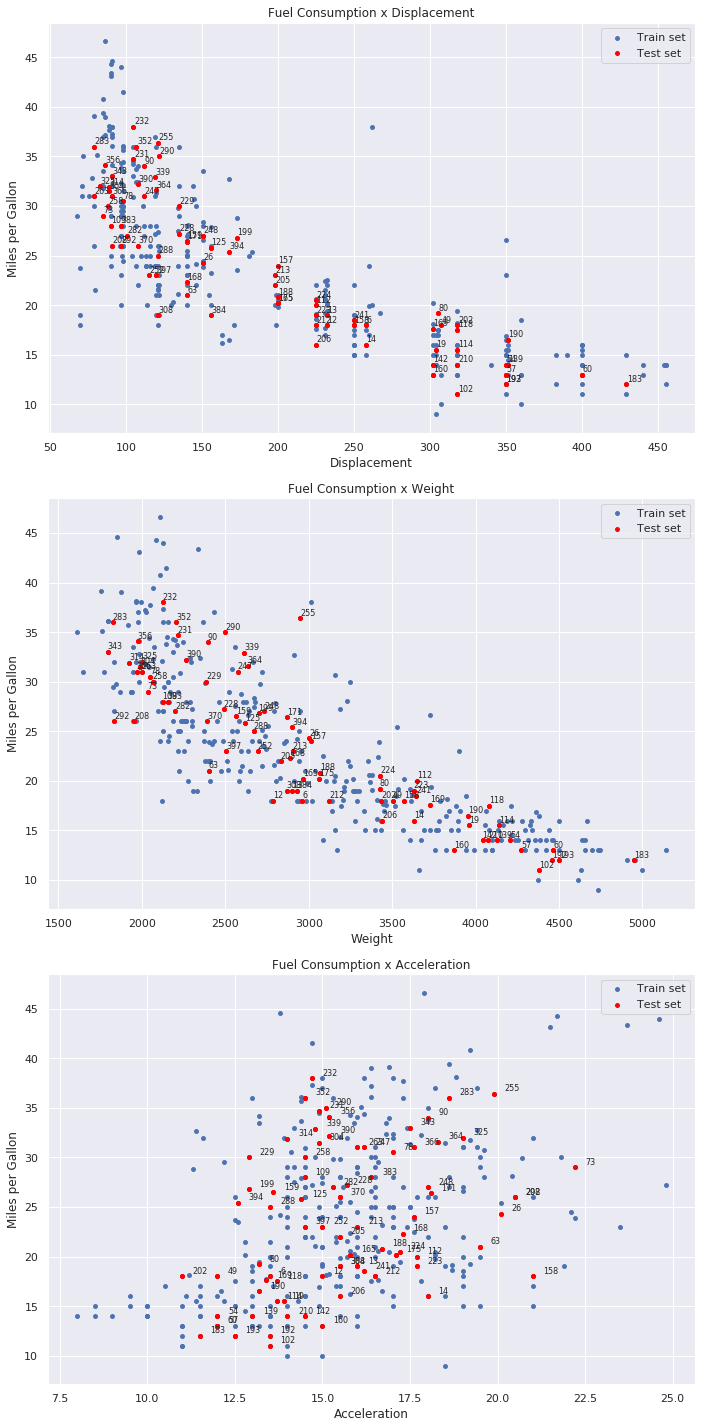

In [40]:
plt.figure(figsize=(10,20))
size = 15
ind = [1, 3, 4]
X_names = ['Displacement', 'Weight', 'Acceleration']

for i, name in enumerate(X_names):
    plt.subplot(3, 1, i+1)
    plt.scatter(X_train.iloc[:, ind[i]], y_train, s=size, label = 'Train set')
    for j, t in enumerate(types):
        x = X_test.iloc[j, ind[i]]
        y = y_test.iloc[j]
        plt.scatter(x, y, color='red', s=size)
        plt.text(x+0.3, y+0.3, t, fontsize=8)
    plt.scatter(X_test.iloc[:, ind[i]], y_test, s=size, c= 'red', label = 'Test set')
    plt.title('Fuel Consumption x '+ name)
    plt.xlabel(name)
    plt.ylabel('Miles per Gallon')
    plt.legend()

plt.tight_layout()
plt.show()

Search for instance:

In [42]:
instance = 255
irt.irt_matrix[instance]

LinearRegression         0.083282
BayesianRidge            0.082413
Lasso                    0.083702
SVR                      0.119308
SVR                      0.067278
KNeighborsRegressor      0.065789
DecisionTreeRegressor    0.064935
RandomForestRegressor    0.127877
AdaBoostRegressor        0.084066
MLPRegressor             0.047742
Name: 255, dtype: float64